### Importación de datos



# **¡primer desafío!**
Alumno: Gerardo Ilú Basurto Ortega

Durante este desafío, ayudaremos al Sr. Juan a decidir qué tienda de su cadena Alura Store debe vender para iniciar un nuevo emprendimiento. Para ello, se analizarán las 4 tiendas:


*   Facturacion total de cada tienda
*   Categorias más populares
*   Promedio de calificación clientes
*   Producto más y menos vendido
*   Costo promedio de envío

El objetivo es identificar la tienda menos eficiente y presentar una recomendación final de cual tienda debe vender basada en los datos analizados.


Herramientas:
Pandas: para manipulación de datos.
Matplotlib: para generación de gráficos



In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda1 = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda1.head(3)

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444


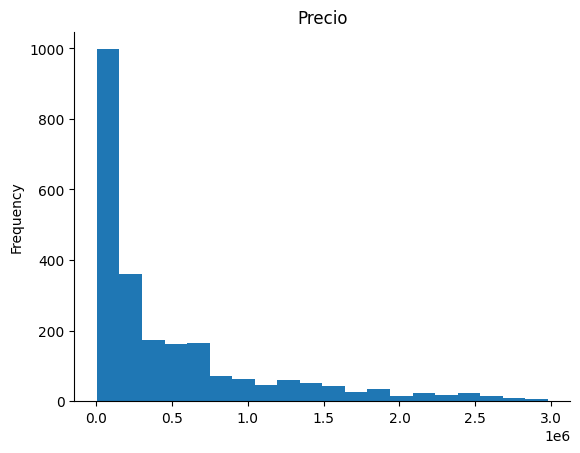

In [ ]:
# @title Precio

from matplotlib import pyplot as plt
tienda['Precio'].plot(kind='hist', bins=20, title='Precio')
plt.gca().spines[['top', 'right',]].set_visible(False)

**Aquí se puede apreciar que la tienda que más factura es:**

Tienda 1 $ 1,150,880,400.00

Tienda 2 $ 1,116,343,500.00

Tienda 3 $ 1,098,019,600.00

Tienda 4 $ 1,038,375,700.00

La tienda que facturo mas fue Tienda1 con un total de $ 1,150,880,400.00

La tienda que facturo menos fue Tienda4 con un total de $ 1,038,375,700.00

#1. Análisis de facturación



In [10]:
# Creo una funcion con un diccionario que contiene tiendas
def union_tiendas():
    # Código de la función
    tiendas = {'Tienda1' : tienda1, 'Tienda2' : tienda2,
            'Tienda3' : tienda3, 'Tienda4' : tienda4}
    return tiendas


# suma de facuras por tienda
factura_tienda1 = tienda1['Precio'].sum()
factura_tienda2 = tienda2['Precio'].sum()
factura_tienda3 = tienda3['Precio'].sum()
factura_tienda4 = tienda4['Precio'].sum()

# Imprime ventas por tienda
print(f'la tienda 1 tiene un monto de ventas de $ {factura_tienda1:,.2f}')
print(f'la tienda 2 tiene un monto de ventas de $ {factura_tienda2:,.2f}')
print(f'la tienda 3 tiene un monto de ventas de $ {factura_tienda3:,.2f}')
print(f'la tienda 4 tiene un monto de ventas de $ {factura_tienda4:,.2f}')

# Agrego a lista_tiendas el total de ventas de cada tienda
lista_tiendas = {'Tienda1' : factura_tienda1, 'Tienda2' : factura_tienda2,
                 'Tienda3' : factura_tienda3, 'Tienda4' : factura_tienda4}
tienda_mayor = max(lista_tiendas, key = lista_tiendas.get)
mayor_valor = lista_tiendas[tienda_mayor]
tienda_menor = min(lista_tiendas, key = lista_tiendas.get)
menor_valor = lista_tiendas[tienda_menor]

print(f'\nLa tienda que facturo mas fue {tienda_mayor} con un total de $ {mayor_valor:,.2f}')
print(f'La tienda que facturo menos fue {tienda_menor} con un total de $ {menor_valor:,.2f}')


la tienda 1 tiene un monto de ventas de $ 1,150,880,400.00
la tienda 2 tiene un monto de ventas de $ 1,116,343,500.00
la tienda 3 tiene un monto de ventas de $ 1,098,019,600.00
la tienda 4 tiene un monto de ventas de $ 1,038,375,700.00

La tienda que facturo mas fue Tienda1 con un total de $ 1,150,880,400.00
La tienda que facturo menos fue Tienda4 con un total de $ 1,038,375,700.00


Grafico de Ventas por cada Tienda


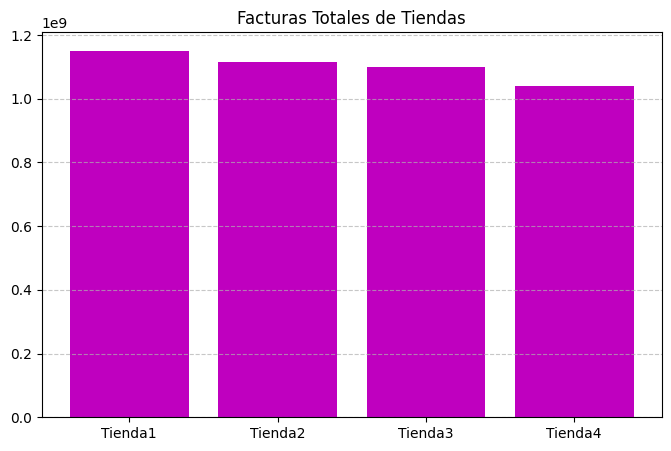

In [11]:
# Nombres de las tiendas (eje x)
tiendas_grafico1 = list(lista_tiendas.keys())

# Ventas de cada Tienda (eje y)
valores_facturacion = list(lista_tiendas.values())

# Crear el gráfico de barras
plt.figure(figsize=(8, 5))
plt.bar(tiendas_grafico1, valores_facturacion, color='m')

# Titulo del Grafico
plt.title('Facturas Totales de Tiendas')
plt.grid(axis='y', linestyle='--', alpha=0.7)


# Categoria de articulos más vendidos
Aqui se encontraran la categoria mas vendida que es:

1.   Electrónicos
2.   Electrodomésicos

Los menos vendidos son

1.   Artículos para el hogar
2.   Libros





In [12]:
# Imprimir facturación por categoría en cada tienda con formato
for nombre_tienda, df in union_tiendas().items():
    facturacion_categoria = df.groupby('Categoría del Producto')['Precio'].sum()
    print(f"\nFacturación por Categoría en {nombre_tienda}:")
    #plt.figure(figsize=(10,6))
    #facturacion_categoria.sort_values(ascending=False).plot(kind='bar', color='skyblue')
    #plt.title(f'Facturación por Categoría en {nombre_tienda}')
    #plt.xlabel('Categoría del Producto')
    #plt.ylabel('Facturación ($):')
    #plt.xticks(rotation=45, ha='right')
    #plt.tight_layout()
    #plt.show()
    for categoria, valor in facturacion_categoria.sort_values(ascending=False).items():
      print(f"  {categoria}: ${valor:,.2f}")




Facturación por Categoría en Tienda1:
  Electrónicos: $429,493,500.00
  Electrodomésticos: $363,685,200.00
  Muebles: $187,633,700.00
  Instrumentos musicales: $91,299,000.00
  Deportes y diversión: $39,290,000.00
  Juguetes: $17,995,700.00
  Artículos para el hogar: $12,698,400.00
  Libros: $8,784,900.00

Facturación por Categoría en Tienda2:
  Electrónicos: $410,831,100.00
  Electrodomésticos: $348,567,800.00
  Muebles: $176,426,300.00
  Instrumentos musicales: $104,990,300.00
  Deportes y diversión: $34,744,500.00
  Juguetes: $15,945,400.00
  Artículos para el hogar: $14,746,900.00
  Libros: $10,091,200.00

Facturación por Categoría en Tienda3:
  Electrónicos: $410,775,800.00
  Electrodomésticos: $329,237,900.00
  Muebles: $201,072,100.00
  Instrumentos musicales: $77,380,900.00
  Deportes y diversión: $35,593,100.00
  Juguetes: $19,401,100.00
  Artículos para el hogar: $15,060,000.00
  Libros: $9,498,700.00

Facturación por Categoría en Tienda4:
  Electrónicos: $409,476,100.00
  E

# 3. Calificación promedio de la tienda
Siendo la mejor calificada:

*   Tienda 3 con un 4.05 %
*   Tienda 2 con un 4.04 %
*   Tienda 4 con un 4.00 %
*   Tienda 1 con un 3.98 %


In [13]:
 promedio_clientes = {}

for nombre, df in union_tiendas().items():
    clientes_promedio = df['Calificación'].mean()
    promedio_clientes[nombre] = clientes_promedio
    # Mostrar calificación promedio por tienda
    print(f"Calificación promedio en {nombre}: {clientes_promedio:.2f}")

Calificación promedio en Tienda1: 3.98
Calificación promedio en Tienda2: 4.04
Calificación promedio en Tienda3: 4.05
Calificación promedio en Tienda4: 4.00


Gráfico Promedio Calificación Clientes

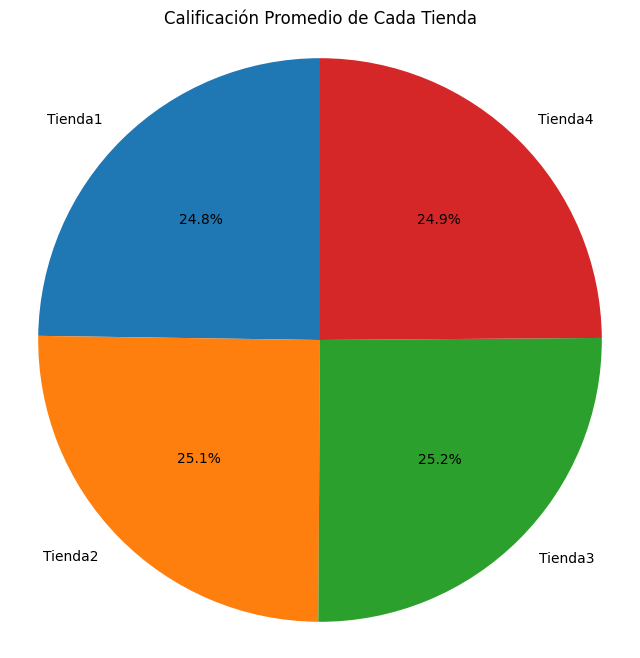

In [14]:
# Grafico de Pastel
plt.figure(figsize=(8,8))
plt.pie(promedio_clientes.values(), labels=union_tiendas().keys(), autopct='%1.1f%%', startangle=90)
plt.title('Calificación Promedio de Cada Tienda')
plt.axis('equal')  # Para que el gráfico de torta sea circular
plt.show()

# 4. Productos más y menos vendidos

In [15]:

# Mostrar ventas por categoría, categoría más y menos vendida en cada tienda
for nombre, df in union_tiendas().items():
    ventas_categoria = df['Categoría del Producto'].value_counts()
    total_ventas = ventas_categoria.sum()  # Total de productos vendidos

    print(f"\nVentas por categoría en {nombre}:\n{ventas_categoria}")

    categoria_mas_vendida = ventas_categoria.idxmax()
    ventas_max = ventas_categoria.max()

    categoria_menos_vendida = ventas_categoria.idxmin()
    ventas_min = ventas_categoria.min()

    print(f"Categoría más vendida: {categoria_mas_vendida} ({ventas_max} ventas)")
    print(f"Categoría menos vendida: {categoria_menos_vendida} ({ventas_min} ventas)")
    print(f"Total de productos vendidos: {total_ventas} productos")

# Crear tabla resumen con ventas por categoría en cada tienda
ventas_por_categoria = pd.DataFrame({
    'Tienda 1': tienda1['Categoría del Producto'].value_counts(),
    'Tienda 2': tienda2['Categoría del Producto'].value_counts(),
    'Tienda 3': tienda3['Categoría del Producto'].value_counts(),
    'Tienda 4': tienda4['Categoría del Producto'].value_counts()
}).fillna(0)




Ventas por categoría en Tienda1:
Categoría del Producto
Muebles                    465
Electrónicos               448
Juguetes                   324
Electrodomésticos          312
Deportes y diversión       284
Instrumentos musicales     182
Libros                     173
Artículos para el hogar    171
Name: count, dtype: int64
Categoría más vendida: Muebles (465 ventas)
Categoría menos vendida: Artículos para el hogar (171 ventas)
Total de productos vendidos: 2359 productos

Ventas por categoría en Tienda2:
Categoría del Producto
Muebles                    442
Electrónicos               422
Juguetes                   313
Electrodomésticos          305
Deportes y diversión       275
Instrumentos musicales     224
Libros                     197
Artículos para el hogar    181
Name: count, dtype: int64
Categoría más vendida: Muebles (442 ventas)
Categoría menos vendida: Artículos para el hogar (181 ventas)
Total de productos vendidos: 2359 productos

Ventas por categoría en Tienda3:
Cate

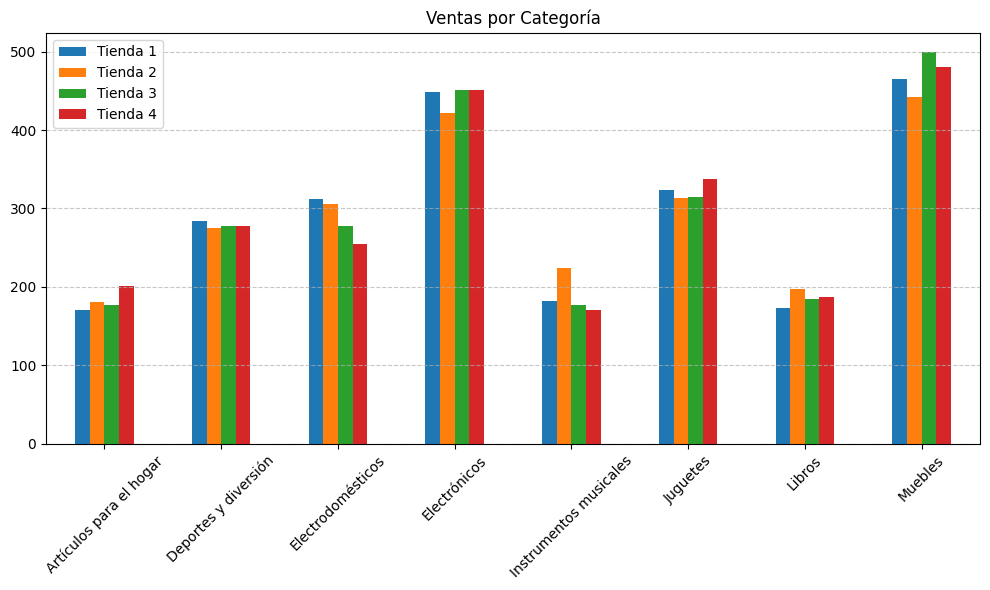

In [ ]:
# Crear gráfico de barras agrupadas
ax = ventas_por_categoria.plot(kind='bar', figsize=(10, 6))  # Guarda en 'ax'
plt.title('Ventas por Categoría')
ax.set_xlabel('')  # Esto ahora sí funciona porque 'ax' está definido correctamente
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 5. Envío promedio por tienda

In [19]:
costo_envio_promedio = {}

for nombre, df in union_tiendas().items():
    promedio = df['Costo de envío'].mean()
    costo_envio_promedio[nombre] = promedio
    # Mostrar costo de envío promedio de la tienda
    print(f"Costo de envío promedio en {nombre}: ${promedio:,.2f}")


Costo de envío promedio en Tienda1: $26,018.61
Costo de envío promedio en Tienda2: $25,216.24
Costo de envío promedio en Tienda3: $24,805.68
Costo de envío promedio en Tienda4: $23,459.46


Text(0, 0.5, 'Costo de envío promedio ($)')

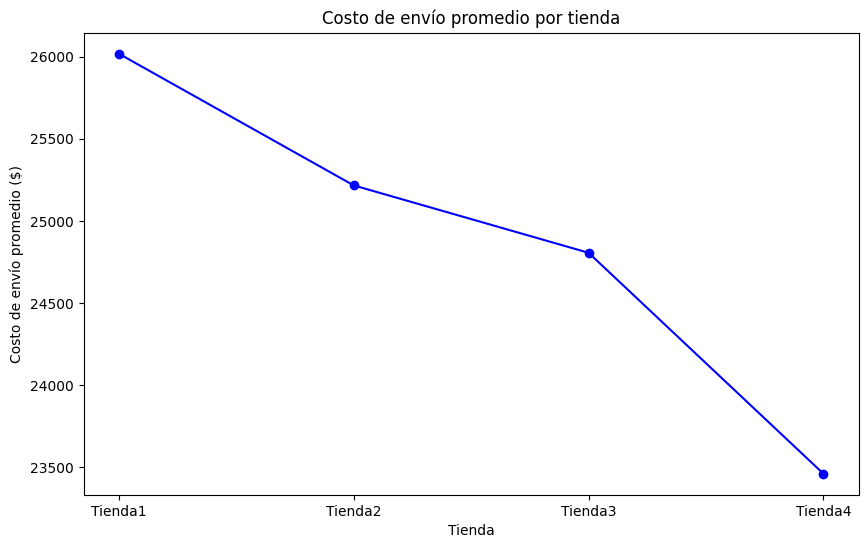

In [20]:
# Datos: nombres de tiendas y sus costos de envío promedio
nombres_tiendas = list(costo_envio_promedio.keys())
costos_promedio = list(costo_envio_promedio.values())

# Crear el gráfico de líneas
plt.figure(figsize=(10, 6))
plt.plot(nombres_tiendas, costos_promedio, marker='o', color='b')

# Agregar título y etiquetas
plt.title('Costo de envío promedio por tienda')
plt.xlabel('Tienda')
plt.ylabel('Costo de envío promedio ($)')

#  Conclusión:

Se le recomienda al **Señor Juan vender la tienda 4,** por ser la que menos factura llegando a presentar una diferencia de facturación respecto a la tienda 1 de $ 112,504,700, aunque sus costos de envío sean bajos esto se debe a que tambien sus ventas son mas bajas y esto hace que aparente que es mas eficiente, aunque en la realidad no sea así.
La calificación de atención por clientes es similar en las 4 tiendas.
